In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pickle

# Load X_train_smote
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/X_train_smote.pkl', 'rb') as file:
    X_train_smote = pickle.load(file)

# Load y_train_smote
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/y_train_smote.pkl', 'rb') as file:
    y_train_smote = pickle.load(file)

# Load X_test
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

# Load y_test
with open('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Processed/y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)



In [8]:
# Drop the CustomerID column
X_test = X_test.drop(columns=['customerID'])

In [4]:
# Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [9]:
# Make Predictions with RFM
y_pred_rf = rf_model.predict(X_test)

Accuracy: 0.7699952673923331
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1552
           1       0.56      0.63      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.72      2113
weighted avg       0.78      0.77      0.77      2113



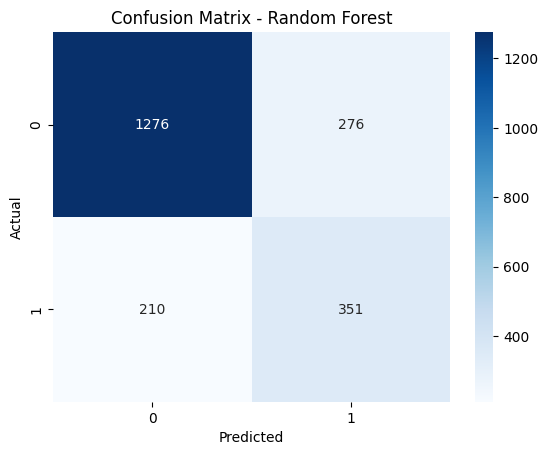

In [10]:
# Print the Classification Report
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The overall accuracy and precision, recall, and f1-score of Churn (1) is not much better from out initial Logistic Regression model and the SMOTE version of our model. 

It is performing better at predicting non churn (0) but we would still like to see a better predition of churns

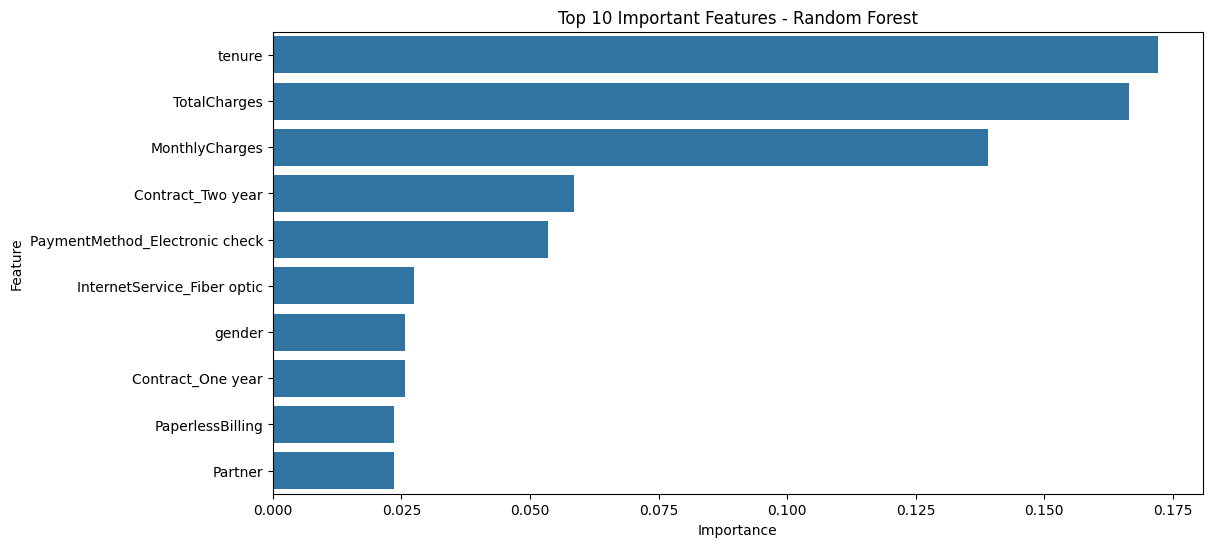

In [13]:
feature_importances = rf_model.feature_importances_
feature_names = X_train_smote.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features - Random Forest')
plt.show()